Scratch work probing differnt versions of the feature set (with rate features, without rate features, PCA/no PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model

In [2]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df_all = pd.read_csv('cleaned_solar_tract_25.csv', encoding='latin-1')

In [3]:
for col in df_all.columns:
    try:
        pd.to_numeric(df_all[col])
    except:
        print(col)

# df = df_all#.dropna()

county
state
electricity_price_transportation


In [4]:
df_all = df_all.loc[:, ~(df_all.columns).isin(['voting_2012_dem_percentage', 'voting_2012_gop_percentage'])]

In [5]:
# 1.) pull out columns that contain strings, solar variables (except target), nonresidential variables

misc = ['Unnamed: 0','Unnamed: 0.1','fips', 'county', 'state']

solar = ['total_panel_area',  'total_panel_area_residential', 'total_panel_area_nonresidential',  
                   'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita', 'heating_fuel_solar', 'heating_fuel_solar_rate',
                'tile_count','tile_count_residential', 'tile_count_nonresidential','number_of_solar_system_per_household', 
                   'solar_system_count','solar_system_count_nonresidential']
non_residential = ['electricity_price_transportation','incentive_count_nonresidential','incentive_nonresidential_state_level',
                   'electricity_consume_commercial','electricity_price_overall', 'electricity_consume_industrial', 
                   'electricity_consume_total','electricity_price_industrial','electricity_price_commercial']

df = df_all.loc[:, ~(df_all.columns).isin(misc + solar + non_residential)]

In [54]:
df.shape

(67936, 141)

In [6]:
def split_scale_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    sclr_X = StandardScaler()
    sclr_X.fit(X_train[X_train.columns])
    
    sclr_y = StandardScaler()
    sclr_y.fit(y_train)

    X_train_scaled = pd.DataFrame(sclr_X.transform(X_train[X_train.columns]), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(sclr_X.transform(X_test[X_test.columns]), columns = X_test.columns)

    y_train_scaled = sclr_y.transform(y_train)
    y_test_scaled = sclr_y.transform(y_test)
    
    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_train, X_test, y_train, y_test, sclr_X, sclr_y

# All Columns

In [7]:
target = 'solar_system_count_residential'

X = df.loc[:, ~(df.columns).isin([target])]
y = df[target]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, X_train, X_test, y_train, y_test, sclr_X, sclr_y = split_scale_data(X, y.reshape(-1, 1))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


## All columns: Non-PCA 

In [8]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf_nopca = ensemble.GradientBoostingRegressor(**params)

clf_nopca.fit(X_train, y_train)
test_score_nopca = clf_nopca.score(X_test, y_test)

print('test score:', test_score_nopca)

# test score: 0.721836427336
# test score: 0.759038089203 (different test/train split)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test score: 0.759038089203


In [ ]:
cv_scores_nopca = cross_val_score(clf_nopca, X_train, y_train, cv = 6)
print('cv_scores:', cv_scores_nopca)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 400, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf_scaled_nopca = ensemble.GradientBoostingRegressor(**params)

clf_scaled_nopca.fit(X_train_scaled, y_train_scaled)
test_score_scaled_nopca = clf_scaled_nopca.score(X_test_scaled, y_test_scaled)

print('test score:', test_score_scaled_nopca)


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test score: 0.758584678642


In [ ]:
cv_scores_scaled_nopca = cross_val_score(clf_scaled_nopca, X_train_scaled, y_train_scaled, cv = 6)
print('cv_scores:', cv_scores_scaled_nopca)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## All Columns: PCA

In [11]:
pca_120 = PCA(n_components=120)
pca_120.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
clf_pca = ensemble.GradientBoostingRegressor(**params)

clf_pca.fit(pca_120.transform(X_train_scaled), y_train_scaled)
test_score_pca = clf_pca.score(pca_120.transform(X_test_scaled), y_test_scaled)
print('test score:', test_score_pca)

# on 100 components: test score: 0.590027047835
# on 120 components: test score: 0.603272862949
# on 120 components: test score: 0.619810365692 (different test/train split)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test score: 0.619810365692


In [52]:
cv_scores_pca = cross_val_score(clf_pca, pca.transform(X_train_scaled), y_train_scaled, cv = 6)
print('cv_scores:', cv_scores_pca)

# on 120 components: cv_scores: [ 0.62884166  0.61601805  0.6327424   0.62992872  0.60306967  0.63781009]

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

cv_scores: [ 0.62884166  0.61601805  0.6327424   0.62992872  0.60306967  0.63781009]


# Omit rate features

In [13]:
edu_omit = ['education_bachelor','education_college','education_doctoral','education_high_school_graduate','education_less_than_high_school','education_master','education_professional_school']
race_omit = ['race_asian','race_black_africa','race_indian_alaska','race_islander','race_other','race_two_more','race_white', 'race_indian_alaska_rate','race_two_more_rate']
heat_fuel_omit = ['heating_fuel_coal_coke','heating_fuel_electricity','heating_fuel_fuel_oil_kerosene','heating_fuel_gas','heating_fuel_housing_unit_count',
'heating_fuel_none','heating_fuel_other','heating_fuel_solar', 'heating_fuel_solar_rate']


edu_rate_omit = ['education_bachelor_rate','education_college_rate','education_doctoral_rate','education_high_school_graduate_rate','education_less_than_high_school_rate','education_master_rate','education_professional_school_rate']
race_rate_omit = ['race_asian_rate','race_black_africa_rate','race_indian_alaska_rate','race_islander_rate','race_other_rate','race_two_more_rate','race_white_rate','race_indian_alaska','race_two_more']
heat_fuel_rate_omit = ['heating_fuel_coal_coke_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_gas_rate','heating_fuel_housing_unit_count_rate',
'heating_fuel_none_rate','heating_fuel_other_rate','heating_fuel_solar_rate', 'heating_fuel_solar']


df_no_ratefeatures = df.loc[:, ~(df.columns).isin(edu_rate_omit + race_rate_omit + heat_fuel_rate_omit)]

In [14]:
X_train_no_ratefeatures = X_train.loc[:, ~(X_train.columns).isin(edu_rate_omit + race_rate_omit + heat_fuel_rate_omit)]
X_test_no_ratefeatures = X_test.loc[:, ~(X_test.columns).isin(edu_rate_omit + race_rate_omit + heat_fuel_rate_omit)]
y_train_no_ratefeatures = y_train
y_test_no_ratefeatures = y_test

X_train_scaled_no_ratefeatures = X_train_scaled.loc[:, ~(X_train_scaled.columns).isin(edu_rate_omit + race_rate_omit + heat_fuel_rate_omit)]
X_test_scaled_no_ratefeatures = X_test_scaled.loc[:, ~(X_test_scaled.columns).isin(edu_rate_omit + race_rate_omit + heat_fuel_rate_omit)]
y_train_scaled_no_ratefeatures = y_train_scaled
y_test_scaled_no_ratefeatures = y_test_scaled

In [39]:
# target = 'solar_system_count_residential'

# X = df_no_ratefeatures.loc[:, ~(df_no_ratefeatures.columns).isin([target])]
# y = df_no_ratefeatures[target]

# X_train_scaled_no_ratefeatures, X_test_scaled_no_ratefeatures, y_train_scaled_no_ratefeatures, y_test_scaled_no_ratefeatures, X_train_no_ratefeatures, X_test_no_ratefeatures, y_train_no_ratefeatures, y_test_no_ratefeatures, sclr_X_no_ratefeatures, sclr_y_no_ratefeatures = split_scale_data(X, y.reshape(-1, 1))


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


## Omit Columns: Non-PCA

In [15]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf_no_ratefeatures = ensemble.GradientBoostingRegressor(**params)

clf_no_ratefeatures.fit(X_train_no_ratefeatures, y_train_no_ratefeatures)
test_score_nopca_noratefeatures = clf_no_ratefeatures.score(X_test_no_ratefeatures, y_test_no_ratefeatures)

print('test score:', test_score_nopca_noratefeatures)

# test score: 0.756760503454
# test score: 0.757071928355 (different train/test split)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test score: 0.757071928355


In [21]:
preds_no_ratefeatures = clf_no_ratefeatures.predict(X_test_no_ratefeatures)

In [42]:
_y_test_no_ratefeatures = []
for ik in range(len(y_test_no_ratefeatures)):
    _y_test_no_ratefeatures.append(y_test_no_ratefeatures[ik][0])

In [57]:
res_no_ratefeatures = _y_test_no_ratefeatures-preds_no_ratefeatures

df_preds = pd.DataFrame({'lat': X_test_no_ratefeatures.lat, 'lon':X_test_no_ratefeatures.lon, 'y_test': _y_test_no_ratefeatures, 'preds': preds_no_ratefeatures, 'residuals':res_no_ratefeatures })

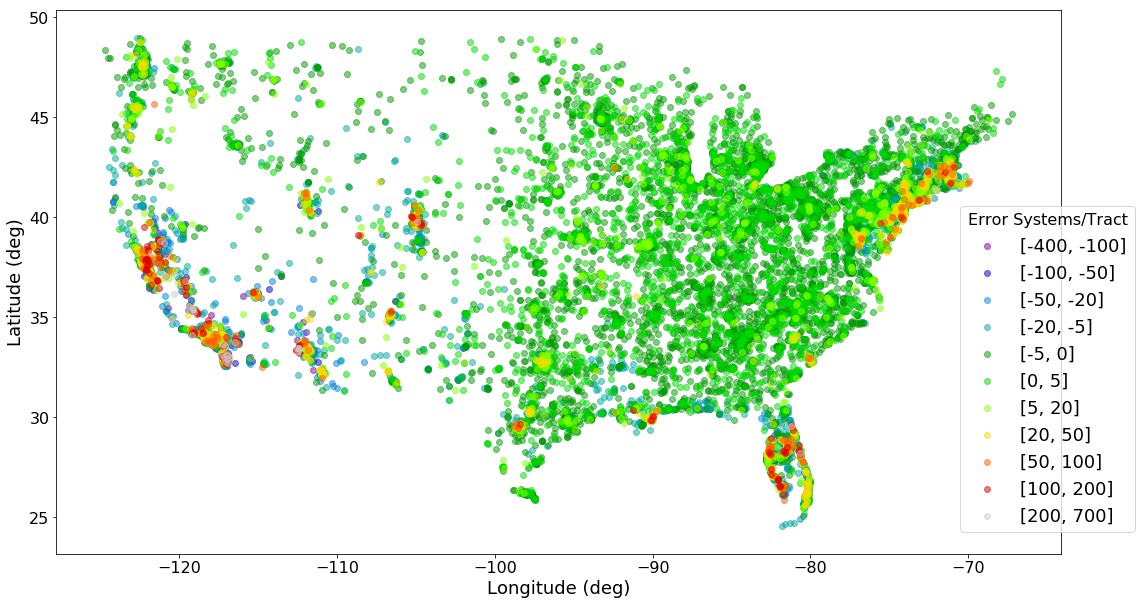

In [79]:
# sns.scatterplot(x = X_test_no_ratefeatures.lon, y = X_test_no_ratefeatures.lat, hue = res_no_ratefeatures)

cmap = plt.cm.get_cmap('nipy_spectral')
intervals = [[-400,-100], [-100, -50],[-50,-20],[-20,-5],[-5,0],[0,5],[5,20],[20, 50], [50, 100], [100, 200], [200, 700] ]

fig, ax = plt.subplots(figsize = [18,10])
for ct_ind, ct in enumerate(intervals):
    rgba = cmap((ct_ind +1)*1/len(intervals) )
    plt.scatter(df_preds[(df_preds['residuals']>=ct[0]) &(df_preds['residuals']<ct[1])].lon, df_preds[(df_preds['residuals']>=ct[0]) &(df_preds['residuals']<ct[1])].lat,c = rgba, alpha = .5, label = ct)


legend = plt.legend(title = 'Error Systems/Tract', fontsize = 18, ncol= 1, loc=(.9,0.04))
legend.get_title().set_fontsize('16') #legend 'Title' fontsize

plt.tick_params(axis='both', labelsize=16)
plt.xlabel('Longitude (deg)', fontsize = 18)
plt.ylabel('Latitude (deg)', fontsize = 18)

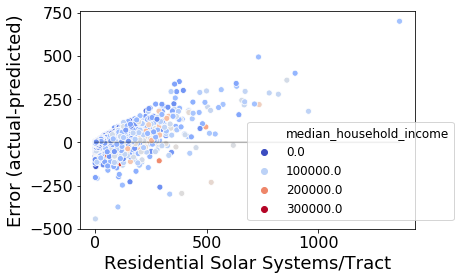

In [104]:
ax = sns.scatterplot(x = _y_test_no_ratefeatures, y = res_no_ratefeatures, hue = X_test_no_ratefeatures.median_household_income, palette='coolwarm')
ax.plot([ik for ik in range(int(np.floor(max(_y_test_no_ratefeatures))))], [0 for ik in range(int(np.floor(max(_y_test_no_ratefeatures))))], c = 'k', alpha = .3)
ax.set_xlabel('Residential Solar Systems/Tract', fontsize = 18)
ax.set_ylabel('Error (actual-predicted)', fontsize = 18)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize = 12,loc=(.5,0.04))



In [126]:
sum([res if res <0 else 0 for res in res_no_ratefeatures])/sum(_y_test_no_ratefeatures)

cts = 0
for ik, ct in enumerate(_y_test_no_ratefeatures):
    if ct>3:
        if np.abs(res_no_ratefeatures[ik]/ct)<.5:
            cts+=1
            
cts/len(res_no_ratefeatures)

0.2570654733867169

In [143]:
df_all[target].skew(axis = 0)

7.4068808019388177

In [85]:
sum(df_all[df_all.state == 'ma'].household_count)/sum(df_all.household_count), len(df_all[df_all.state == 'ma'])/len(df_all)

(0.021192123382705392, 0.019518370230805465)

In [ ]:
cv_scores_no_ratefeatures = cross_val_score(clf_no_ratefeatures, X_train_no_ratefeatures, y_train_no_ratefeatures, cv = 6)
print('cv_scores:', cv_scores_no_ratefeatures)

In [16]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf_scaled_no_ratefeatures = ensemble.GradientBoostingRegressor(**params)

clf_scaled_no_ratefeatures.fit(X_train_scaled_no_ratefeatures, y_train_scaled_no_ratefeatures)
test_score_scaled_nopca_noratefeatures = clf_scaled_no_ratefeatures.score(X_test_scaled_no_ratefeatures, y_test_scaled_no_ratefeatures)

print('test score:', test_score_scaled_nopca_noratefeatures)

# test score: 0.757148309101 (different train/test split)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test score: 0.757148309101


In [ ]:
cv_scores_scaled_no_ratefeatures = cross_val_score(clf_scaled_no_ratefeatures, X_train_scaled_no_ratefeatures, y_train_scaled_no_ratefeatures, cv = 6)
print('cv_scores:', cv_scores_scaled_no_ratefeatures)

## Omit Columns: PCA

In [42]:
pca = PCA(n_components=100)
pca.fit(X_train_scaled_no_ratefeatures)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
clf2_pca_no_ratefeatures = ensemble.GradientBoostingRegressor(**params)

clf2_pca_no_ratefeatures.fit(pca.transform(X_train_scaled_no_ratefeatures), y_train_scaled_no_ratefeatures)
test_score_pca_no_ratefeatures = clf2_pca_no_ratefeatures.score(pca.transform(X_test_scaled_no_ratefeatures), y_test_scaled_no_ratefeatures)
print('test score:', test_score_pca_no_ratefeatures)

# on 100 components: test score: 0.637466864954

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test score: 0.637466864954


In [45]:
cv_scores_pca_no_ratefeatures = cross_val_score(clf2_pca_no_ratefeatures, pca.transform(X_train_scaled_no_ratefeatures), y_train_scaled_no_ratefeatures, cv = 6)
print('cv_scores:', cv_scores_pca_no_ratefeatures)

# on 100 components: cv_scores: [ 0.64649082  0.62461106  0.6024068   0.57162299  0.6133      0.61602934]

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

cv_scores: [ 0.64649082  0.62461106  0.6024068   0.57162299  0.6133      0.61602934]
